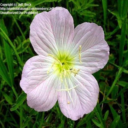

In [2]:
import torchvision
import torch
from PIL import Image

# Create a vector of zeros of size 5
size = (128, 128)
transform = torchvision.transforms.Compose([torchvision.transforms.Resize(size), torchvision.transforms.ToTensor()])
train_dataset = list(torchvision.datasets.Flowers102('./flowers', 'train', transform=transform, download=True))
test_dataset = list(torchvision.datasets.Flowers102('./flowers', 'test', transform=transform, download=True))

def visualize_image(img: torch.Tensor) -> Image.Image:
    return Image.fromarray((img.permute(1, 2, 0) * 255).to(torch.uint8).numpy())

visualize_image(train_dataset[1][0])

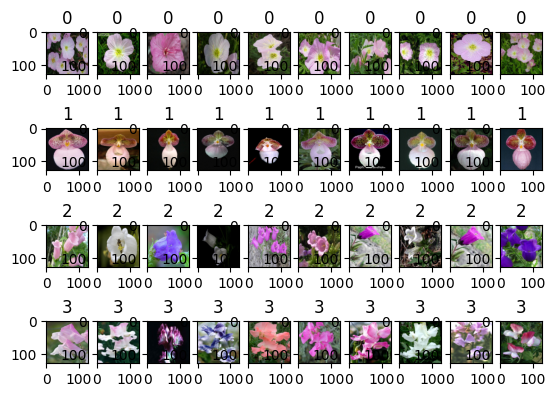

In [3]:
import matplotlib.pyplot as plt
f, ax = plt.subplots (4, 10)
for i, (im, label) in enumerate(train_dataset[:40]):
    ax[i // 10, i % 10].imshow(visualize_image(im))
    ax[i // 10, i % 10].set_title(label)

class_01 = train_dataset[:20]

In [11]:
train_image = torch.stack([im for im, _ in train_dataset], dim=0) # Get all the labels
train_label = torch.tensor([label for _, label in train_dataset]) # Get all the labels

model = torch.nn.Linear(128 * 128 * 3, 102) # Output a value for each class (a total of 102 classes)
loss = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001, momentum=0)

for epoch in range(1000):
    # Compute model predictions
    pred_label = model(train_image.view(-1, 128 * 128 * 3))

    # Compute loss
    loss_val = loss(pred_label, train_label)

    # Compute gradients
    optimizer.zero_grad() # Reset the gradients to zero, otherwise it is going to add up the gradients with every iteration
    loss_val.backward()
    optimizer.step()

    if epoch % 10 == 0 :
        print(f'Epoch {epoch}, loss: {loss_val.item()}')

Epoch 0, loss: 4.665123462677002
Epoch 10, loss: 4.580963611602783
Epoch 20, loss: 4.521317005157471
Epoch 30, loss: 4.467890739440918
Epoch 40, loss: 4.416903495788574
Epoch 50, loss: 4.367491722106934
Epoch 60, loss: 4.319418430328369
Epoch 70, loss: 4.272584915161133
Epoch 80, loss: 4.226925849914551
Epoch 90, loss: 4.182389259338379
Epoch 100, loss: 4.138923645019531
Epoch 110, loss: 4.0964837074279785
Epoch 120, loss: 4.05502462387085
Epoch 130, loss: 4.014503002166748
Epoch 140, loss: 3.9748787879943848
Epoch 150, loss: 3.93611478805542
Epoch 160, loss: 3.8981738090515137
Epoch 170, loss: 3.861021041870117
Epoch 180, loss: 3.82462477684021
Epoch 190, loss: 3.7889537811279297
Epoch 200, loss: 3.753978729248047
Epoch 210, loss: 3.719672203063965
Epoch 220, loss: 3.6860079765319824
Epoch 230, loss: 3.6529617309570312
Epoch 240, loss: 3.6205098628997803
Epoch 250, loss: 3.588629722595215
Epoch 260, loss: 3.5573015213012695
Epoch 270, loss: 3.5265047550201416
Epoch 280, loss: 3.496220

In [14]:
test_image = torch.stack([im for im, _ in test_dataset], dim=0)
test_label = torch.tensor([label for _, label in test_dataset])

pred_label = model(test_image.view(-1, 128 * 128 * 3))
print((pred_label.argmax(dim=1) == test_label).float().mean())

tensor(0.1467)
